# Amiraliarbab - 9918113 - FinalProject

In [2]:
import pandas as pd
import numpy as np
import itertools
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Preprocessing

In [3]:
df = pd.read_csv("./Mall_Customers.csv")
# Drop Customer ID 
df = df.drop(labels=["CustomerID"] , axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Set seed for numpy

In [4]:
np.random.seed(42)

## Describe dataset

In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Split Dataset

In [6]:
# make index list
index = np.asarray(range(0 , len(df)))
# Index Permutation
index = np.random.permutation(index)
# define Pivot
percent = 0.8
pivot = int(len(df) * percent)

# Define Index for Train
x1_index = index[:pivot]
x2_index = index[pivot:]
len(x1_index) , len(x2_index)

(160, 40)

In [7]:
x1_index , x2_index

(array([ 95,  15,  30, 158, 128, 115,  69, 170, 174,  45,  66, 182, 165,
         78, 186, 177,  56, 152,  82,  68, 124,  16, 148,  93,  65,  60,
         84,  67, 125, 132,   9,  18,  55,  75, 150, 104, 135, 137, 164,
         76,  79, 197,  38,  24, 122, 195,  29,  19, 143,  86, 114, 173,
          5, 126, 117,  73, 140,  98, 172,  96, 169,  97,  31,  12,  35,
        119,  42, 189,  90, 136,  51, 127, 162,  41, 118, 113,  26, 139,
        100, 111,   2,  77,  46, 187, 191,  85, 161,  36, 190,  61,  22,
        141, 101,  33,  11, 194, 159,   6,  27, 120,   4,  32, 142, 145,
        109, 144,  10,  62, 112, 146, 166,   0, 198, 153,  70, 123,  64,
         44, 163,  28,  40, 108, 155, 156,  25,  23, 184, 147,  81,  39,
        168,  47,  94, 154,  43, 138,   3, 105,  53, 133, 180, 178, 185,
         49,  80,  34,   7, 110,  91,  83, 176, 181,  89,   8,  13,  59,
        171, 131,  17,  72]),
 array([175, 134, 167, 183,  63,  54, 107,  50, 196,  58,  48,  88,  21,
         57, 160, 192

In [8]:
x_train = df.iloc[x1_index]
x_test = df.iloc[x2_index]

In [9]:
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
95,Male,24,60,52
15,Male,22,20,79
30,Male,60,30,4
158,Male,34,78,1
128,Male,59,71,11


In [10]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
175,Female,30,88,86
134,Male,20,73,5
167,Female,33,86,95
183,Female,29,98,88
63,Female,54,47,59


## Normalize Data

In [11]:
from sklearn.preprocessing import StandardScaler
# Make a instance from StandardScaler
scaler = StandardScaler()
# Fit on train and just transform for test dataset
x_train_norm = scaler.fit_transform(x_train.drop(labels=["Gender"],axis=1))
x_test_norm = scaler.transform(x_test.drop(labels=["Gender"],axis=1))
x_train_norm.shape , x_test_norm.shape

((160, 3), (40, 3))

## Convert `Gender` column to numeric format

In [12]:
Gender_train = x_train["Gender"].apply(lambda x : 1 if x=="Female" else 0)
Gender_test = x_test["Gender"].apply(lambda x : 1 if x=="Female" else 0)

In [13]:
# Concatenate Gender Column to main dataframe
x_train_final = np.c_[x_train_norm , Gender_train]
x_test_final = np.c_[x_test_norm , Gender_test]
x_train_final.shape , x_test_final.shape

((160, 4), (40, 4))

# K-means

In [14]:
# Define function
def k_means(data , k ):
    """
    data : dataset 
    k : number of cluster  
    retruns:
    Centers with shape -> [ k , n_features]
    labels with shape -> [num_sampels]
    model : best model
    """
    model = KMeans(n_clusters=k , verbose=0 , n_init = 15 , max_iter=400).fit(data)
    centers, labels = model.cluster_centers_ , model.labels_
    return centers , labels , model

In [15]:
centers , labels , model = k_means(x_train_final , k=10)
centers.shape ,labels.shape

((10, 4), (160,))

## Elbow method

For this purpose we need two metrics :


    Distortion = 1/n * Σ(distance(point, centroid)^2) 
    
    Inertia = Σ(distance(point, centroid)^2)

In [16]:
# Find the optimum K with Elbow

distortions = []
Silhouette = []
labels = []
mapping1 = {}
mapping2 = {}
K = range(2, 11)
X = x_train_final
for k in K:
    # Building and fitting the model
    centers , label , kmeanModel = k_means(X , k)
    # Track labels
    labels.append(label) # Shape : (number of data , )
    # Find distance between every point and every center cluster
    distance = cdist(X, centers,'euclidean') # shape (number of data , number of centers)
    # Find the nearst Cluster distance
    sort_arr = np.sort(distance,axis=1)
    # First nearst distance for every point and first nearst center
    nearst_1 = sort_arr[: , 0]
    # Second nearst distance for every point and second nearst center
    nearst_2 = sort_arr[: , 1] 
    # Average distance for every point in cluster (distortion)
    distortion = sum(np.power(nearst_1 , 2)) / X.shape[0]
    distortions.append(distortion)
    # Find Silhouette 
    S = (nearst_1 - nearst_2) / np.maximum(nearst_1 , nearst_2)
    Silhouette.append(S)
    # Save distortion and Silhouette according to K
    mapping1[k] = distortion
    mapping2[k] = S

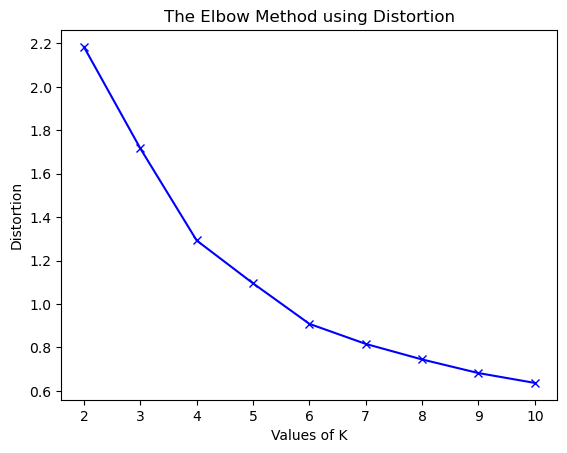

In [17]:
# Let see the results for Elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

we can see that we have `Elbow` in `k = 4` & `k = 6`

In [18]:
# We have 
np.asarray(Silhouette).shape , np.asarray(labels).shape

((9, 160), (9, 160))

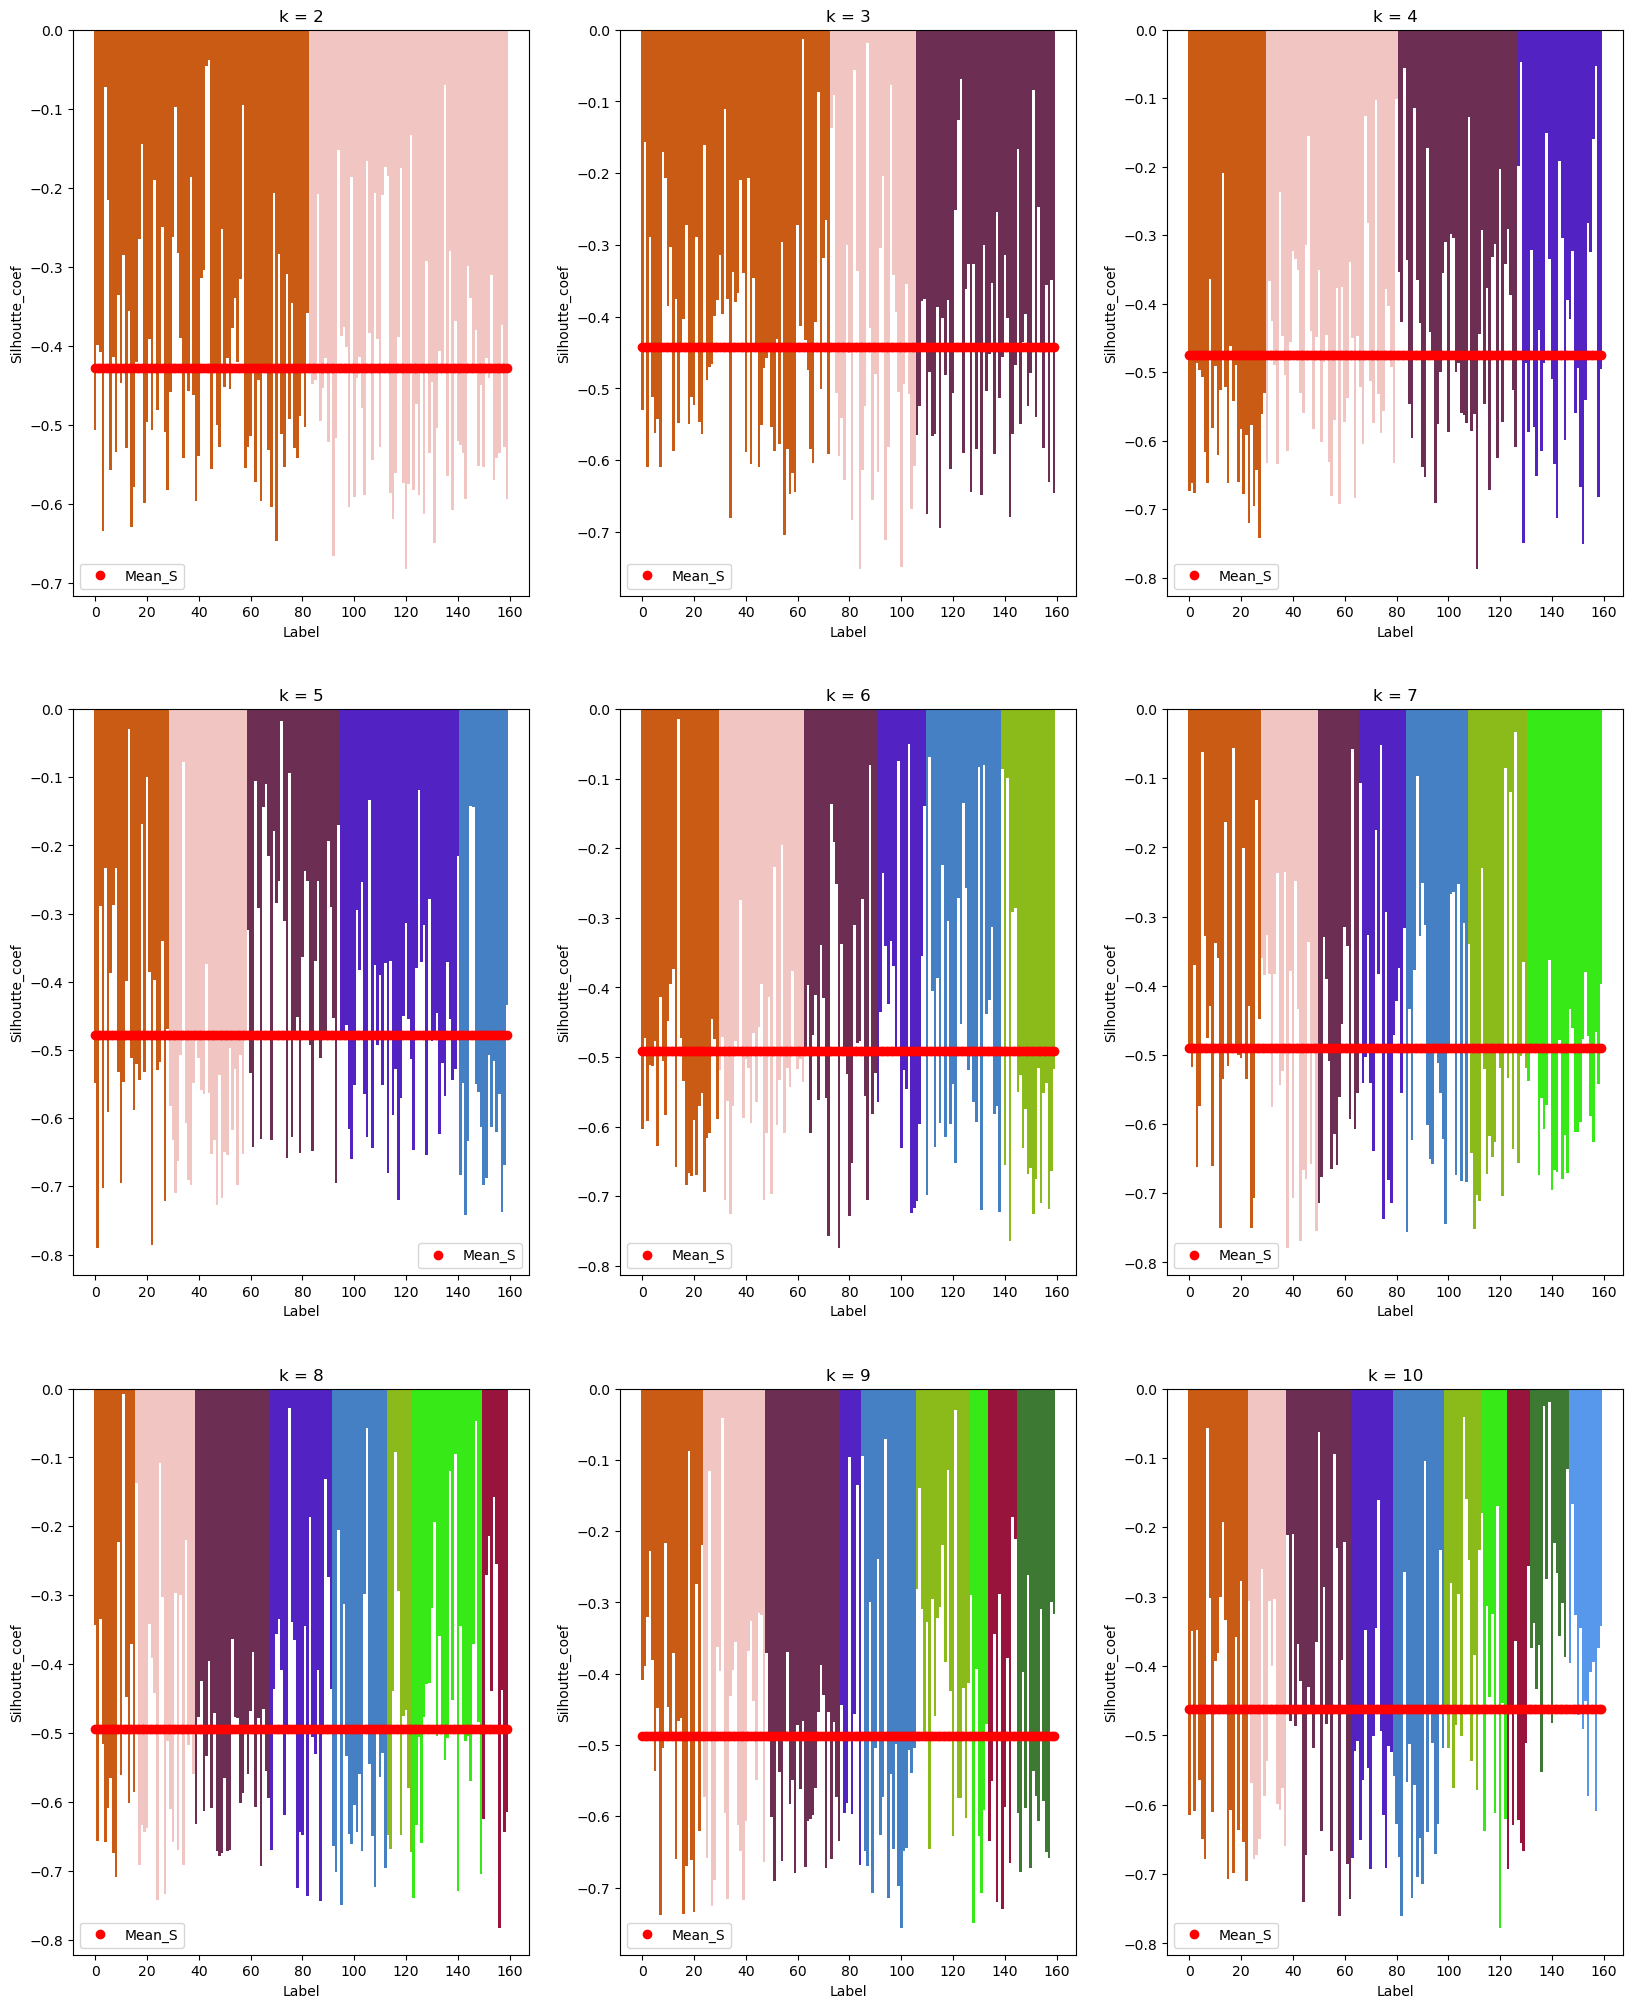

In [19]:
# plot results for Silhouette
plt.figure(figsize=(20,25))
# Define random colors for every cluster
colors = np.random.randint(0,255,size=(len(K)+1,3)) / 255.0
for n, x in enumerate(itertools.zip_longest(Silhouette,labels)):
    k = n + 2
    S , l = x[0] , x[1]
    mean_S = np.mean(S)
    # Define dataframe
    SL_df = pd.DataFrame({"Label" : l , "Silhoutte_coef" : S}).sort_values(by="Label").reset_index()
    plt.subplot(3 , 3 ,n+1)
    plt.title(f"k = {k}")
    plt.bar(range(len(S)) ,SL_df["Silhoutte_coef"] , color=colors[SL_df["Label"],:],width=1)
    plt.ylabel("Silhoutte_coef")
    plt.xlabel("Label")
    plt.plot(range(0 , len(S)) , [mean_S for _ in range(len(S))] ,"ro",label="Mean_S")
    plt.legend()
plt.show();

As we can see according to Plots the best value for *k* is `4` because it has `Elbow` in Elbow plot and in `Silhoutte` plot we have normal **size** and **lenght** for every `Cluster` . 

For `n_clusters=4`, all the plots are more or less of similar thickness and hence are of similar sizes, as can be
considered as best ‘k’.

## Prediction for Test data

In [20]:
_ ,_ , model = k_means(x_train_final , k=4)
pred = model.predict(x_test_final)
pred.shape

(40,)

In [21]:
# Save pred to csv file
df = pd.DataFrame(np.c_[x_test_final , pred],columns=["Age","Annual Income (k$)","Spending Score (1-100)","Gender","Pred"])
df.to_csv("predicts.csv")
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Pred
0,-0.618326,1.123022,1.424262,1.0,2.0
1,-1.329557,0.536588,-1.701637,0.0,3.0
2,-0.404957,1.044831,1.771584,1.0,2.0
3,-0.689449,1.513979,1.501445,1.0,2.0
4,1.088627,-0.479899,0.382296,1.0,0.0


## Dimension  Reduction

In [22]:
# Dimention reduction for train data
pca = PCA(n_components=2)
train_pca = pca.fit_transform(x_train_final)
test_pca = pca.fit_transform(x_test_final)

In [23]:
# Train model on new data
centers ,labels , model = k_means(train_pca,k=4)

In [24]:
# Prediction on test data
pred = model.predict(test_pca)

In [25]:
df["Pred_on_pca_test"] = pred
df.to_csv("predicts.csv")

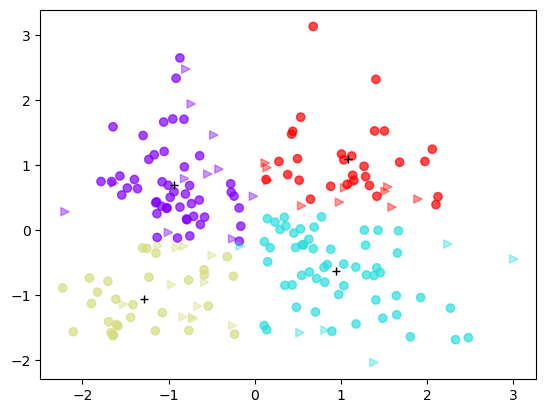

In [26]:
# Plot 2d data
plt.set_cmap("rainbow_r")
# Plot train data
plt.scatter(train_pca[:,0],train_pca[:,1],c=labels , alpha=0.7)
# Plot test data
plt.scatter(test_pca[:,0],test_pca[:,1],c=pred,alpha = 0.4,marker=">")
# Plot Centers
plt.scatter(centers[:,0],centers[:,1],color=(0,0,0),alpha=1 , marker="+" , linewidths=1);
# plt.axis(False);